In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('fire_stats.csv')

In [10]:
df

,Unnamed: 0,method,roc,r2,annual_r2,seasonal_r2,spatial_r2,bias
0,0,training,0.895868,0.084699,0.673347,0.982253,0.122766,0.002498
1,1,split_halves_0,0.879188,0.086853,0.646046,0.927383,0.043119,0.084522
2,2,split_halves_1,0.892754,0.064752,0.643167,0.968158,0.090320,-0.075622
3,3,split_halves_2,0.900348,0.061063,0.198510,0.914081,0.090519,-0.101352
4,4,split_halves_3,0.886127,0.063741,0.665815,0.932261,0.034740,0.154635
5,5,split_halves_4,0.899703,0.059726,0.690030,0.861278,-0.004546,-0.007032
6,6,split_halves_5,0.892497,0.070562,0.658788,0.835584,0.016406,-0.006822
7,7,split_halves_6,0.879113,0.056603,0.652233,0.916893,0.024551,0.188625
8,8,split_halves_7,0.888366,0.060635,0.714640,0.960045,0.098215,-0.063575
9,9,split_halves_8,0.886298,0.082537,0.585247,0.967534,0.059192,0.054198


In [14]:
df[df['method'].str.contains('split_halves')]['roc'].mean()

0.8882692795113085

In [18]:
df[df['method'].str.contains('split_halves')]['r2'].mean()

0.06655732275362651

In [16]:
df[df['method'].str.contains('split_halves')]['annual_r2'].mean()

0.6167544351830465

In [17]:
df[df['method'].str.contains('split_halves')]['seasonal_r2'].mean()

0.9221378351433452

In [15]:
df[df['method'].str.contains('split_halves')]['spatial_r2'].mean()

0.04903762230048151

In [43]:
results = {}
results['null'] = df[df['method'].str.contains('shuffle_all')]
results['split'] = df[df['method'].str.contains('split_halves')]
results['extrap'] = df[df['method'].str.contains('extrapolate')]

In [19]:
plt.rcParams.update({'font.size': 14, 'svg.fonttype': 'none'})

In [107]:
plot_params = {
    'roc': {'ylim': [0.5, 0.95], 'ylabel': 'Hurdle ROC', 'yticks': [0.5, 0.6, 0.7, 0.8, 0.9]},
    'r2': {'ylim': [-0.02, 0.07], 'ylabel': 'Hurdle R2'},
    'annual_r2': {'ylim': [-0.1, 0.95], 'ylabel': 'Annual R2'},
    'seasonal_r2': {'ylim': [-0.1, 0.95], 'ylabel': 'Seasonal R2'},
    'spatial_r2': {'ylim': [-0.02, 0.07], 'ylabel': 'Spatial R2'}
}

In [111]:
def style(ax, params):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    if 'ylim' in params.keys():
        ax.set_ylim(params['ylim'])
    if 'yticks' in params.keys():
        ax.set_yticks(params['yticks'])
    if 'ylabel' in params.keys():
        ax.set_ylabel(params['ylabel'])
    
def plot_lines(ax, field):
    ax.hlines([
        results['null'][field].min(), 
        results['null'][field].median(), 
        results['null'][field].max()
    ], 0, 1, color='gray')

def plot_dots(ax, field):
    ax.plot([0.25], [results['split'][field].median()], '.', color='black', markersize=15)
    ax.plot([0.75], [results['extrap'][field].median()], '.', color='gray', markersize=15)

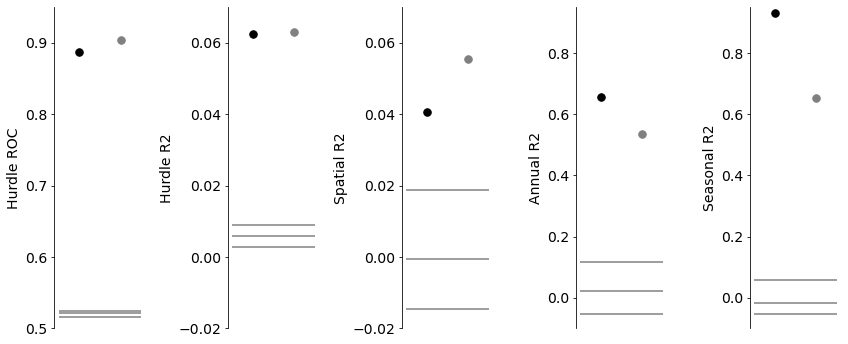

In [116]:
fig, axs = plt.subplots(
    nrows=1,
    ncols=5,
    figsize=(12, 5),
)

for i, field in enumerate(['roc', 'r2', 'spatial_r2', 'annual_r2', 'seasonal_r2']):
    plot_lines(axs[i], field)
    plot_dots(axs[i], field)
    style(axs[i], plot_params[field])

plt.tight_layout()
plt.savefig('Supplementary-Figure-6.svg')

In [121]:
df[df['method'].str.contains('split_halves')]['bias'].median()

0.02368806149859075

In [122]:
df[df['method'].str.contains('extrapolate')]['bias'].median()

-0.5162266704213693